# <div align='center'> 深度增强学习Deep Reinforcement Learning </div>

Perception --> Policy --> Action(Control)

# Markov Decision Process(MDP)

<img src="../assets/timg.jpeg" height="100px" width="400px"/>

| 符号 | 描述 |
|------|------|
|<img width='200'/> | <img width='600'/> |
| $S$ | 状态集(the set of all valid states), 环境的状态空间(观察Observation) |
| $A$| 动作集(the set of all valid actions), agent可选择的动作空间 |
| $R(s，a)$ |  奖励函数，返回的值表示在**s**状态下执行**a**动作的奖励, $r_t = R(s_t, a_t, s_{t+1})$|
| $T(s'|s,a)$ |  状态转移概率函数，表示从**s**状态执行**a**动作后环境转移至**s′**状态的概, $P(s'|s, a)$|
| $\rho_0$ |  起始状态分布 the starting state distribution |

> 执行动作 a 的效果只与当前状态有关，与之前历史状态无关 $P(s_{t+1}|s_t) = P(s_{t+1}|s_1,...,s_t)$


```                                           
                                   Action
                                     |
                                     |
                           +---------+----------+
                           |                    |
                           |                    |
                           v                    v
         Policy:     Deterministic           Stochastic

                    T：S × A -> S        T：S × A -> Prob(S)
                                                |
                                                |
                                      +---------+---------+
                                      |                   |
                                      v                   v
                                 Categorical          Gaussian

        Action Spaces:            Discrete             Continuous                               
                                                                    
```                                           

Agent: $\pi(a)$


MDP过程中,可以有无数种策略(policy),找到最佳的路径实际上就是找到最佳的Policy 来最大化V函数(Value Function)或者Q函数(Action-Value Function).

1. Determinstic: 

$$
s_{t+1} = f(s_t, a_t) \\
R(\tau) = \sum_0^T{r_t} \text{       finite-horizon undiscounted return}
$$


2. Stochastic: 

$$
s_{t+1} \sim P(\cdot|s_t, a_t) \\
R(\tau) = \sum_0^{\infty}\gamma^t{r_t} \text{        infinite-horizon discounted return}
$$

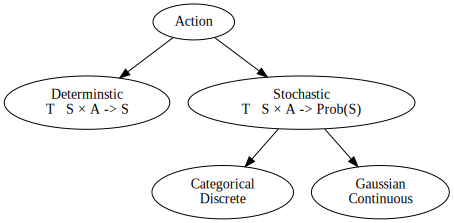

In [5]:
from graphviz import Digraph

dot = Digraph()
dot.node('1', label='Action')
dot.node('2', label='Determinstic\nT：S × A -> S')
dot.node('3', label='Stochastic\nT：S × A -> Prob(S)')
dot.node('4', label='Categorical\nDiscrete')
dot.node('5', label='Gaussian\nContinuous')

dot.edges(['12', '13', '34', '35'])
dot

---------

## [songrotek](https://blog.csdn.net/songrotek/article/details/50580904)

> Agent: 具备行为能力的物体 
    
> 增强学习的任务就是找到一个最优的策略policy从而使reward最多, 在轨迹上最大化累积奖励

> 状态的好坏其实等价于对未来回报的期望 (Return)

# The Bellman Equations

## Reward & Return

RL agents learn to maximize cumulative future **reward**. The word used to describe cumulative future reward is **return** and is often denoted with $R$.


$$
R_t = r_{t+1} + r_{t+2} + r_{t+3} + r_{t+4} + \dots + = \sum_{k=0}^{\infty}r_{t + k + 1}  \tag{1}
$$


## Episodic 

Tasks that always terminate are called episodic.


## Discounted

More common than using future cumulative reward as return is using future cumulative **discounted** reward:


$$
R_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \gamma^3 r_{t+4} + \dots + = \sum_{k=0}^{\infty}\gamma^k r_{t + k + 1}  \tag{2}
$$

$\gamma$: discount factor

it gives a greater weight to sooner rewards, meaning that we care more about imminent rewards and less about rewards we will receive further in the future.


[understanding-rl-the-bellman-equations](https://joshgreaves.com/reinforcement-learning/understanding-rl-the-bellman-equations/)


## Policy $\pi(s, a)$

It is a function that takes in a state and an action and returns the **probability** of taking that action in that state. Therefore, for a given state, it must be true that $\sum_a{\pi(s, a)} = 1$

Our goal in reinforcement learning is to learn an optimal policy $\pi^*$ (An optimal policy is a policy which tells us how to act to maximize return in every state)

## Value Functions

There are two types of value functions that are used in reinforcement learning: the state value function, denoted $V(s)$, and the action value function, denoted $Q(s, a)$.


$V(s)$: It is the expected return when starting from state s acting according to our policy $\pi$

$$
V^\pi(s) = \mathbb{E}_\pi \big[R_t | s_t = s \big ] \tag{1}
$$


$Q(s, a)$: The action value function tells us the value of taking an action in some state when following a certain policy.


$$
Q^\pi(s, a) = \mathbb{E}_\pi \big[R_t | s_t = s, a_t = a \big ] \tag{2}
$$

$V^\pi(s) = \underset{a \sim \pi}{\mathbb{E}} \big[ Q^\pi(s, a) \big]$


> we use an expectation is that there is some randomness in what happens after you arrive at a state. You may have a stochastic policy, which means we need to combine the results of all the different actions that we take. Also, the transition function can be stochastic, meaning that we may not end up in any state with 100% probability


Optimal Value Function: 

$$
V^* = \underset{\pi}{\mathbf{max}}\  \mathbb{E}_\pi \big[R_t | s_t = s \big ]
$$


Optimal Action-Value Function:

$$
Q^* = \underset{\pi}{\mathbf{max}}\  \mathbb{E}_\pi \big[R_t | s_t = s, a_t = a \big ]
$$

$V^*(s) = \underset{a}{max}Q^*(s, a)$

## The Bellman Equations


$\mathcal{P}$ is the transition probability. If we start at state s and take action a we end up in state $s'$ with probability $\mathcal{P}_{s s'}^{a}$.

$$
\mathcal{P}_{s s'}^a = Pr(s_{t+1} = s' | s_t = s, a_t = a)
$$


$\mathcal{R}_{s s'}^{a}$ is another way of writing the expected (or mean) reward that we receive when starting in state s, taking action a, and moving into state $s'$.

$$
\mathcal{R}_{s s'}^a = \mathbb{E}\big [ r_{t+1} | s_t = s, s_{t+1} = s', a_t = a \big ]
$$

==> 

$$
\begin{align*}
V^\pi(s) &= \mathbb{E}_\pi \big[ r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \gamma^3 r_{t+4} + \dots | s_t = s \big ] \\
&= \mathbb{E}_\pi \big [ \sum_{k=0}^{\infty}\gamma^k r_{t + k + 1} | s_t = s \big ] \\
&= \mathbb{E}_\pi \big[ r_{t+1} + \gamma \sum_{k=0}^{\infty}\gamma^k r_{t + k + 2} | s_t = s \big ] \\
&= \mathbb{E}_\pi \big [ r_{t+1} | s_t = s \big ] +  \mathbb{E}_\pi \big[ \gamma \sum_{k=0}^{\infty}\gamma^k r_{t + k + 2} | s_t = s \big ]  \\
&= \sum_{a}{\pi(s, a)} \sum_{s'}{\mathcal P_{s s'}^{a} \mathcal R_{s s'}^a } +  \sum_{a}{\pi(s, a)} \sum_{s'}{\mathcal P_{s s'}^{a} \gamma \mathbb{E}_\pi \big [ \sum_{k=0}^{\infty}\gamma^k r_{t + k + 2} | s_{t+1} = s' \big] } \\
&= \sum_{a}{\pi(s, a)} \sum_{s'}{\mathcal P_{s s'}^{a}} \bigg [ \mathcal R_{s s'}^a + \gamma \mathbb{E}_\pi \big [ \sum_{k=0}^{\infty}\gamma^k r_{t + k + 2} | s_{t+1} = s' \big] \bigg] \\
&= \sum_{a}{\pi(s, a)} \sum_{s'}{\mathcal P_{s s'}^{a}} \bigg [ \mathcal R_{s s'}^a + \gamma V^{\pi}(s') \bigg] \tag{3} \\
Q^{\pi}(s,a) &= \sum_{s'} \mathcal{P}_{ss'}^{a} \bigg[ \mathcal{R}_{ss'}^{a} + \gamma \sum_{a'} \pi(s', a') Q^{\pi}(s', a') \bigg] \tag{4}
\end{align*}
$$






-----------------------

$$
\begin{align}
 v(s) & =  E[G_t|S_t = s] \\\\
      & =  E[R_{t+1}+\gamma R_{t+2} + \gamma ^2R_{t+3} + ...|S_t = s] \\\\ 
      & =  E[R_{t+1}+\gamma (R_{t+2} + \gamma R_{t+3} + ...)|S_t = s] \\\\
      & =  E[R_{t+1} + \gamma G_{t+1}|S_t = s] \\\\ 
      & =  E[R_{t+1} + \gamma v(S_{t+1})|S_t = s]
\end{align}
$$

$$
\begin{align}
Q^\pi(s,a) & =   E[r_{t+1} + \gamma r_{t+2} + \gamma^2r_{t+3} + ... |s,a] \\\\
& = E_{s^\prime}[r+\gamma Q^\pi(s^\prime,a^\prime)|s,a]
\end{align}
$$

-----------------------


$$
\begin{align}
V^\pi(s) &= E_\pi \{R_t | s_t = s\} = E_\pi \{\sum_{k=0}^\infty \gamma^k r_{t+k+1} | s_t = s\} \\
Q^\pi(s, a) &= E_\pi \{R_t | s_t = s, a_t = a\} = E_\pi \{\sum_{k=0}^\infty \gamma^k r_{t+k+1} | s_t = s, a_t=a\} \\
V^\pi(s) &= \sum_{a \in A} \pi (a|s) * Q^\pi(a,s)
\end{align}
$$


--------------

[a](https://blog.csdn.net/songrotek/article/details/50580904)
[b](https://zhuanlan.zhihu.com/p/55481462)

# Strategies

## exploration/exploitation

1. exploration: picking an action of which the agent does not know whether it will perform well or not

2. exploitation: picking the action of which the agent thinks it performs best

### 1. Random

This strategy represents pure **exploration** and will sample actions from a **uniform distribution** that representsthe action space. 

### 2. Greedy

The greedy strategy always picks the action the policy thinks performs best, even when this policy has not converged yet. Therefore, this strategy embodies pure exploitation, and is the opposite of the Random strategy.


### 3. Epsilon-greedy ($\epsilon$-greedy)

The agent picks a greedy approach, as explained above, with probability 1−$\epsilon$ and picks an exploratory approach, like the Randomstrategy explained above, with probability $\epsilon$.

### 4. Decaying epsilon-greedy

This strategy functions the sameas normal $\epsilon$-greedy, however the epsilon value changes as a function of time, according to $\gamma$ with $\gamma^t$ as a function of time.


### 5. Softmax

[大地小神云盘](https://pan.baidu.com/s/1PJKtO8AukvLDEaIqwj8C0A "提取码: rhnc")

# Q-Learning

适用于: 状态和动作的组合是有限的

每个状态以$\pi$的概率进行探索

## Terms

### States and Observations

1. 状态(states)是对世界状况的完整描述, 没有隐藏信息

2. 观察(observations)是对状态的部分描述, 有一些信息被略掉了

视觉观察(像素矩阵RGB)

机器人(关节角度和速度)


1. 完全观察fully observed: 当agent能够观察到环境的完整状态

2. 部分观察partially observed: 当agent只能看到部分环境

> agent只能观察环境，不能直接得到环境的状态, 动作以观察为条件


### Action Spaces

给定环境中的所有有效行为集合通常称为行为空间

离散的行为空间 (经典控制游戏)
 
连续的行为空间 (机器人)


### Policies

agent用来决定行为的规则, 本质上是agent的大脑


### Trajectories (Episodes)

轨迹$\tau$是在世界中的一系列状态和行为
$$
\tau = (s_0, a_0, s_1, a_1, s_2, a_2, \cdots) \\
s_0 \sim \rho_0(\cdot)
$$

### Reward and Return

所有的奖励$R(\tau)=$

1. finite-horizon undiscounted return (有限期不折扣的回报)


2. infinite-horizon discounted return (无限期折扣回报)

> 数学上：无限期的奖励总和可能不会收敛到有限值，并且很难在方程中处理，但是在折扣因子以及一定的条件下，这个求和是收敛的。


[RL中的关键概念](https://zhuanlan.zhihu.com/p/55481462)

Bellman方程, 基本思想: 起始点的值是从当前位置获得的奖励期望，在加上下次落脚点值的期望
可以通过迭代来进行计算


如果知道了每个动作的估值，那么就可以选择估值最好的一个动作去执行了。

In [2]:
https://blog.csdn.net/liweibin1994/article/details/79111536

SyntaxError: invalid syntax (<ipython-input-2-d858e725dfac>, line 1)

$$
v_{\pi}(s) = \sum_{a\in A}\pi(a|s)(R_s^a + \gamma \sum_{s' \in S}P_{ss'}^a v_{\pi}(s'))
$$

In [ ]:
https://www.zhihu.com/question/26408259

In [ ]:
动作集合的数量将直接影响整个任务的求解难度